In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("twitter_training.csv")

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
col_name=['ID','Entity','Sentiments','Contest']
df=pd.read_csv("twitter_training.csv",names=col_name)

In [5]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.shape

(74682, 4)

In [7]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [8]:
df.columns

Index(['ID', 'Entity', 'Sentiments', 'Contest'], dtype='object')

In [9]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [12]:
df.duplicated().sum()

2340

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(71656, 4)

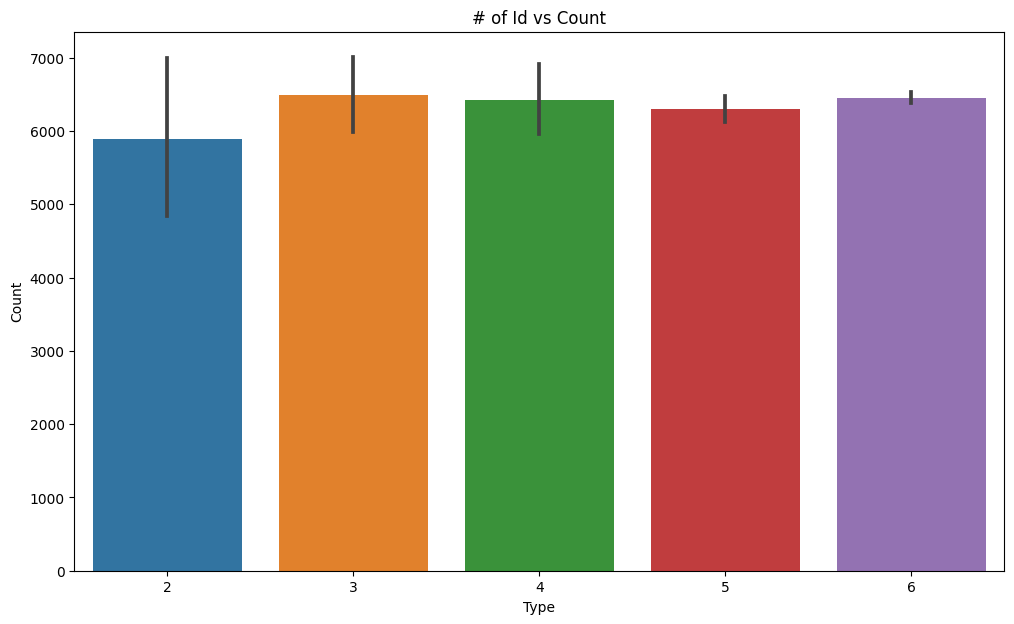

In [22]:
id_types=df['ID'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("# of Id vs Count")
plt.show()

In [15]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

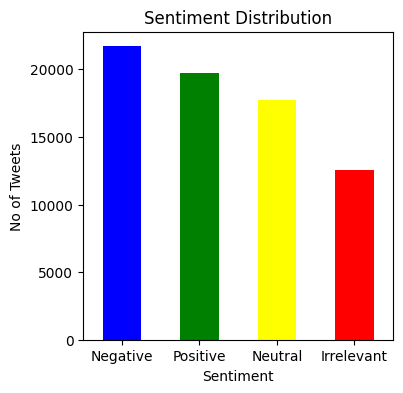

In [16]:
plt.figure(figsize= (4,4))
sentiment_counts.plot(kind='bar',color=['blue','green','yellow','red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment') 
plt.ylabel('No of Tweets')
plt.xticks(rotation=0)
plt.show()

In [17]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

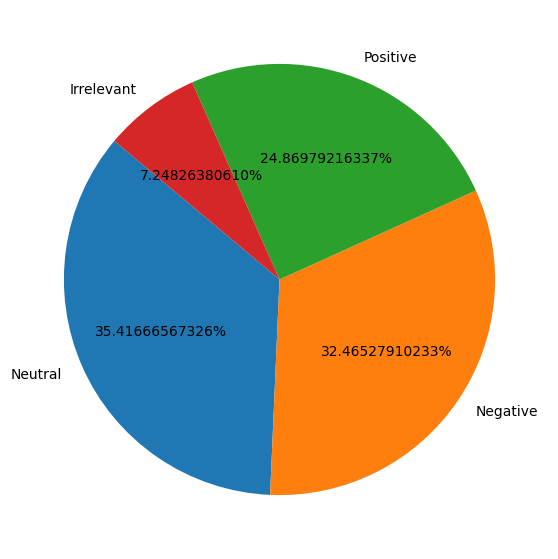

In [18]:
plt.figure(figsize= (7,7))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()

In [25]:
game_types=df['Entity'].value_counts()
game_types

Entity
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                     

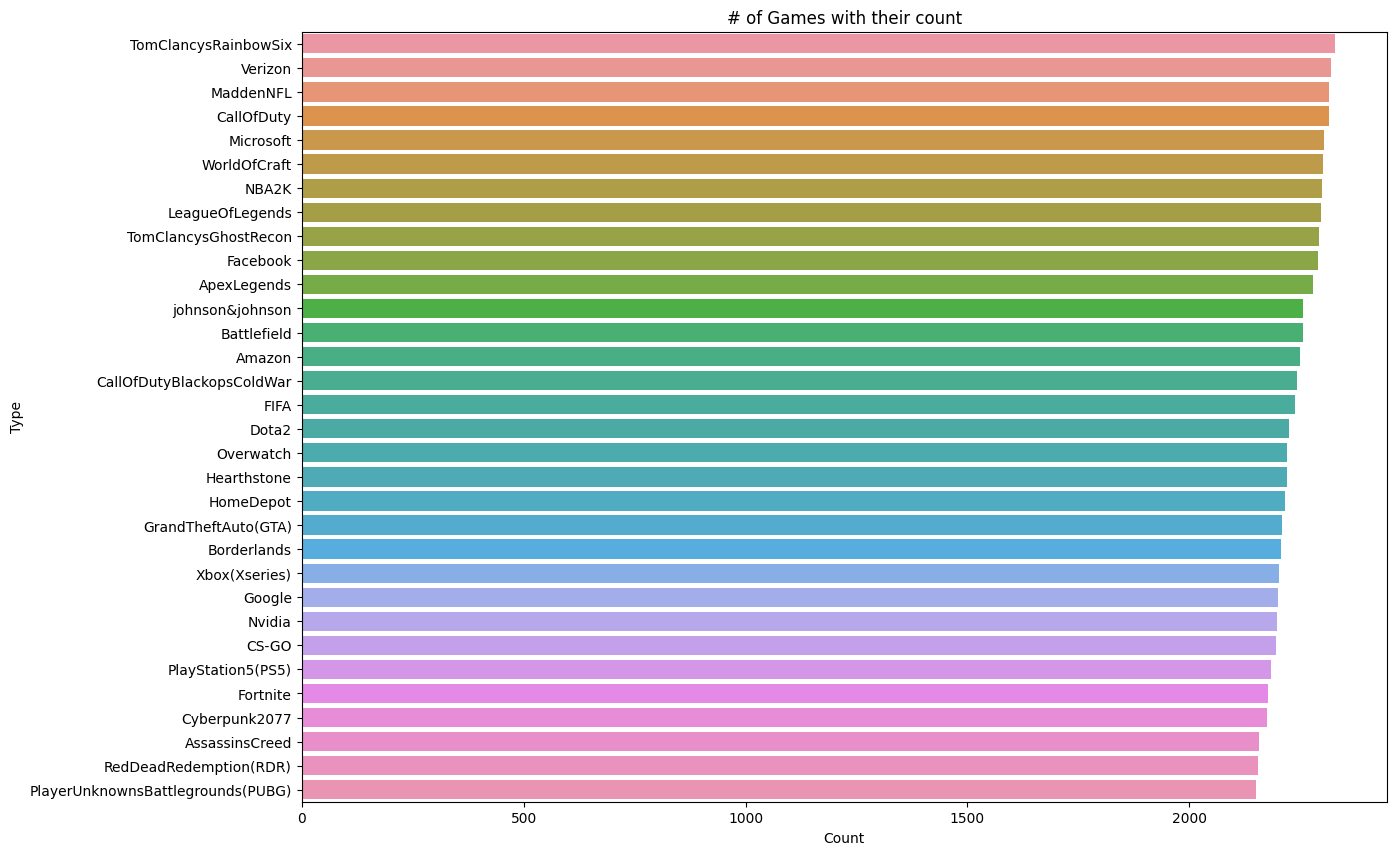

In [26]:
plt.figure(figsize= (14,10))
sns.barplot(x=game_types.values,y=game_types.index)
plt.title('# of Games with their count')
plt.xlabel('Count') 
plt.ylabel('Type')
plt.show()

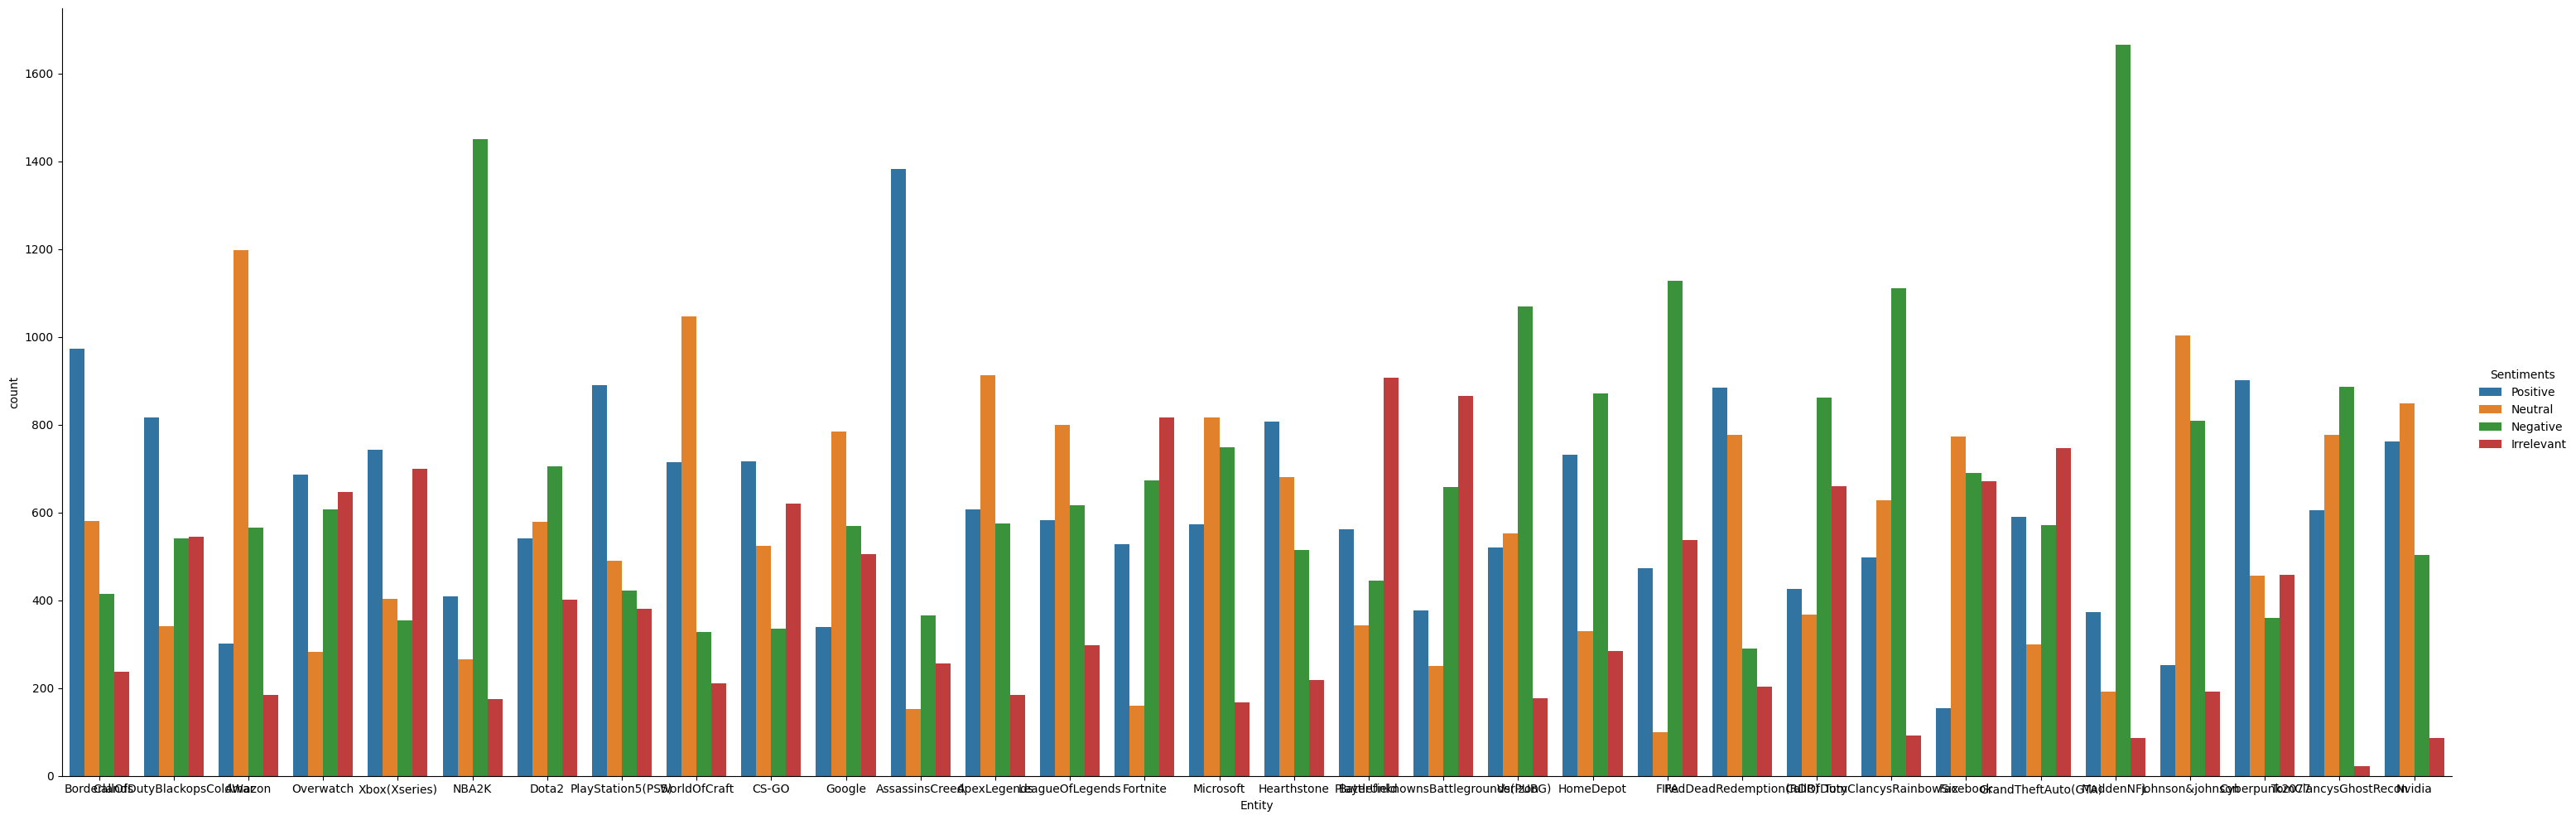

In [29]:
sns.catplot(x="Entity",hue="Sentiments",kind="count",height=10,aspect=3,data=df)

In [31]:
total_null=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
print("Total records=", df.shape[0])
missing_data=pd.concat([total_null,percent.round(2)], axis=1, keys =['Total Missing', 'In Percent'])
missing_data.head(10)

Total records= 71656


,Total Missing,In Percent
ID,0,0.0
Entity,0,0.0
Sentiments,0,0.0
Contest,0,0.0


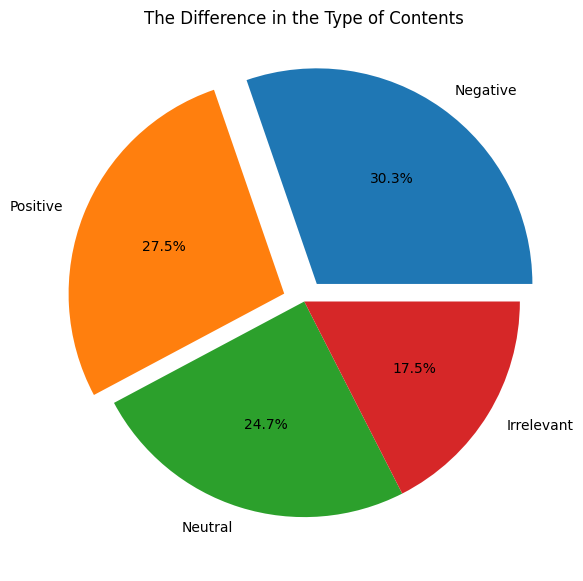

In [38]:
Sentiments_types=df['Sentiments'].value_counts()
plt.figure(figsize=(12,7))
plt.pie(x=Sentiments_types.values, labels=Sentiments_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title("The Difference in the Type of Contents")
plt.show()

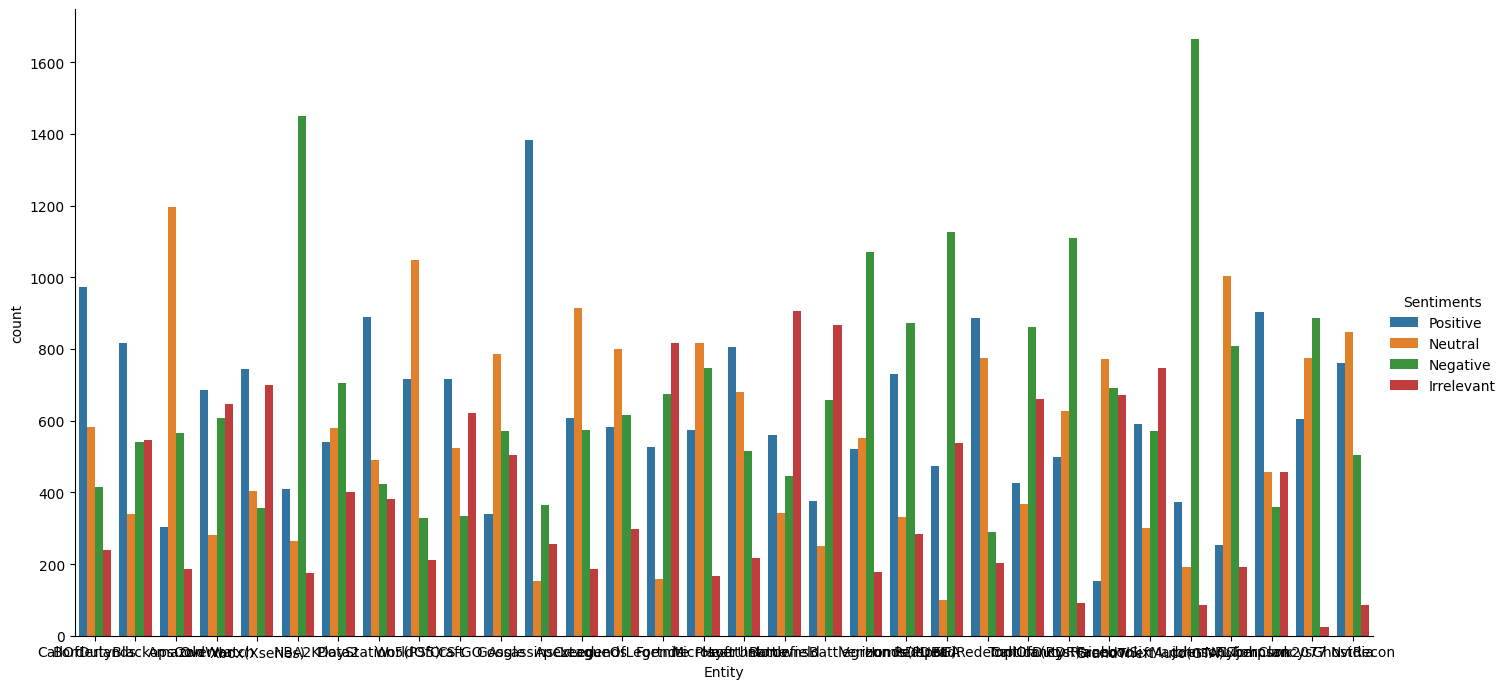

In [39]:
sns.catplot(x="Entity",hue="Sentiments",kind="count",height=7,aspect=2,data=df)